In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# dexpy/Design-Expert history

* Initial release 1985, written in Pascal
* Moved to C++ in 1996
* Used Python for some prototyping/validation, but mostly R
* Started using Python with Boost::Python in 2015 for testing components
* Moved to build system to waf (Python) from CMake (DSL)
* Created dexpy in 2016 based on the Design-Expert testing library

# Design of Experiments

A systematic series of tests, in which purposeful changes are made to input factors, so that you may identify causes for significant changes in the output repsonses.

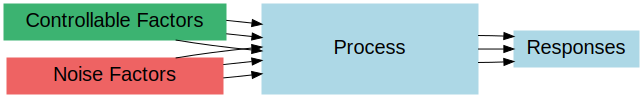

In [2]:
from graphviz import Digraph

dot = Digraph(comment='Design of Experiments')
dot.body.extend(['rankdir=LR', 'size="10,10"'])
dot.node_attr.update(shape='rectangle', style='filled', fontsize='20', fontname="helvetica")

dot.node('X', 'Controllable Factors', color='mediumseagreen', width='3')
dot.node('Z', 'Noise Factors', color='indianred2', width='3')
dot.node('P', 'Process', color='lightblue', height='1.25', width='3')
dot.node('Y', 'Responses', color='lightblue')

dot.edges(['XP', 'ZP', 'PY'] * 3)

dot

# Traditional Approach to Experimentation

* One factor at a time
* Cannot detect interactions
* Inefficient

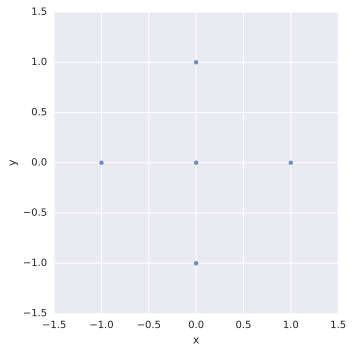

In [3]:
import seaborn as sns
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

points = [
    [0, 0],
    [-1, 0],
    [1, 0],
    [0, -1],
    [0, 1],
]

plot = sns.lmplot('x', 'y', data=pd.DataFrame(points, columns=['x', 'y']), fit_reg=False)

# Factorial Design

* Multifactor testing
* Reveals interactions
* Maximizes information with minimum runs

In [4]:
print("TODO: neat graph of Factorial design coverage")

TODO: neat graph of Factorial design coverage


In [5]:
import dexpy.factorial
from IPython.display import display, Markdown
from prettypandas import PrettyPandas
design = dexpy.factorial.build_factorial(4, 8)
display(Markdown("# Design Matrix:"))
display(PrettyPandas(design))

from dexpy.alias import alias_list
display(alias_list("(A*B*C*D)**2", design)[0])

# Design Matrix:

['Intercept = A:B:C:D',
 'A = B:C:D',
 'B = A:C:D',
 'A:B = C:D',
 'C = A:B:D',
 'A:C = B:D',
 'B:C = A:D',
 'A:B:C = D']

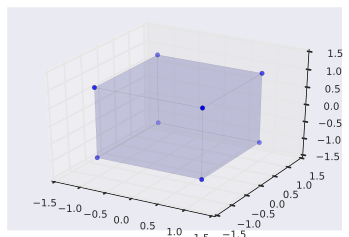

In [6]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
points = np.array(design)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid([-1,1], [-1,1])
cube_alpha = 0.1
ax.plot_surface(X, Y, 1, alpha=cube_alpha)
ax.plot_surface(X, Y, -1, alpha=cube_alpha)
ax.plot_surface(X, -1, Y, alpha=cube_alpha)
ax.plot_surface(X, 1, Y, alpha=cube_alpha)
ax.plot_surface(1, X, Y, alpha=cube_alpha)
ax.plot_surface(-1, X, Y, alpha=cube_alpha)
ax.scatter3D(points[:, 0], points[:, 1], points[:, 2])
plt.show()